In [ ]:
from keras.layers import SimpleRNN
from keras.models import Sequential
from keras.layers import Embedding

In [ ]:
model = Sequential()
model.add(Embedding(1000,32))
model.add(SimpleRNN(32))
model.summary()

In [ ]:
model = Sequential()
model.add(Embedding(1000,32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

In [ ]:
model = Sequential()
model.add(Embedding(1000,32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

## IMDB VERİ KÜMESİNİ HAZIRLAMAK


In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [ ]:
num_features = 1000
maxlen = 500
batch_size = 32

In [ ]:
print('Load data..')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = num_features)
print(len(input_train), 'Eğitim dizisi',input_train.shape)
print(len(input_test), 'Test dizisi',input_train.shape)

Load data..
25000 Eğitim dizisi (25000,)
25000 Test dizisi (25000,)


In [ ]:
print('Pad sequence (sample x train)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print(len(input_train), 'Eğitim dizisi',input_train.shape)
print(len(input_test), 'Test dizisi',input_train.shape)

Pad sequence (sample x train)
25000 Eğitim dizisi (25000, 500)
25000 Test dizisi (25000, 500)


## EMBEDDING VE SIMPLERNN KATMANLARININ EĞİTİLMESİ


In [ ]:
from keras.layers import Dense
from keras import layers

## BASİT RNN İLE MODELLEME

In [ ]:
model = Sequential()
model.add(Embedding(num_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_15 (SimpleRNN)    (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 34,113
Trainable params: 34,113
Non-trainable params: 0
_________________________________________________________________


## MODELİN DERLENMESİ - RNN

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 20s 126ms/step - loss: 0.6750 - acc: 0.5623 - val_loss: 0.5888 - val_acc: 0.6802
Epoch 2/10
157/157 [==============================] - 19s 123ms/step - loss: 0.6141 - acc: 0.7034 - val_loss: 0.5095 - val_acc: 0.7576
Epoch 3/10
157/157 [==============================] - 19s 123ms/step - loss: 0.4502 - acc: 0.7980 - val_loss: 0.5327 - val_acc: 0.7268
Epoch 4/10
157/157 [==============================] - 19s 123ms/step - loss: 0.4187 - acc: 0.8179 - val_loss: 0.4442 - val_acc: 0.7946
Epoch 5/10
157/157 [==============================] - 19s 123ms/step - loss: 0.3862 - acc: 0.8338 - val_loss: 0.3942 - val_acc: 0.8284
Epoch 6/10
157/157 [==============================] - 20s 124ms/step - loss: 0.3667 - acc: 0.8451 - val_loss: 0.3743 - val_acc: 0.8430
Epoch 7/10
157/157 [==============================] - 19s 123ms/step - loss: 0.3588 - acc: 0.8475 - val_loss: 0.3934 - val_acc: 0.8284
Epoch 8/10
157/157 [==============================] - 2

## BASİT BİR LSTM İLE MODELLEME

In [ ]:
model = Sequential()
model.add(layers.Embedding(num_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

## MODELİN DERLENMESİ - LSTM 



In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 86s 546ms/step - loss: 0.5827 - acc: 0.6973 - val_loss: 0.4654 - val_acc: 0.8058
Epoch 2/10
157/157 [==============================] - 85s 542ms/step - loss: 0.4233 - acc: 0.8196 - val_loss: 0.3776 - val_acc: 0.8450
Epoch 3/10
157/157 [==============================] - 85s 544ms/step - loss: 0.3685 - acc: 0.8461 - val_loss: 0.3825 - val_acc: 0.8270
Epoch 4/10
157/157 [==============================] - 86s 546ms/step - loss: 0.3506 - acc: 0.8533 - val_loss: 0.4423 - val_acc: 0.8126
Epoch 5/10
157/157 [==============================] - 86s 546ms/step - loss: 0.3294 - acc: 0.8646 - val_loss: 0.3394 - val_acc: 0.8588
Epoch 6/10
157/157 [==============================] - 86s 547ms/step - loss: 0.3246 - acc: 0.8654 - val_loss: 0.3574 - val_acc: 0.8442
Epoch 7/10
157/157 [==============================] - 86s 547ms/step - loss: 0.3211 - acc: 0.8682 - val_loss: 0.3506 - val_acc: 0.8508
Epoch 8/10
157/157 [==============================] - 8

## SONUÇLARIN ÇİZDİRİLMESİ

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

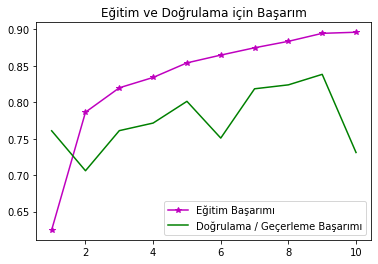

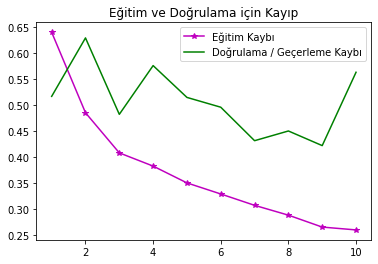

In [ ]:
plt.plot(epochs, acc, 'm*-', label='Eğitim Başarımı')
plt.plot(epochs, val_acc, 'g', label='Doğrulama / Geçerleme Başarımı')
plt.title('Eğitim ve Doğrulama için Başarım')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'm*-', label='Eğitim Kaybı')
plt.plot(epochs, val_loss, 'g', label='Doğrulama / Geçerleme Kaybı')
plt.title('Eğitim ve Doğrulama için Kayıp')
plt.legend()

plt.show()

In [ ]:
print(acc, 'eğitim başarımları')

[0.6248499751091003, 0.786300003528595, 0.8197500109672546, 0.8339499831199646, 0.853950023651123, 0.8646000027656555, 0.8746500015258789, 0.8834999799728394, 0.8944500088691711, 0.8959500193595886] eğitim başarımları
